In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
cars = pd.read_csv('Churn_Modelling.csv')
print(cars)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

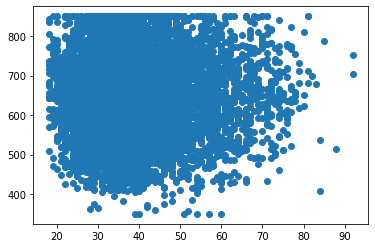

In [9]:
plt.scatter(cars.Age,cars.CreditScore)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

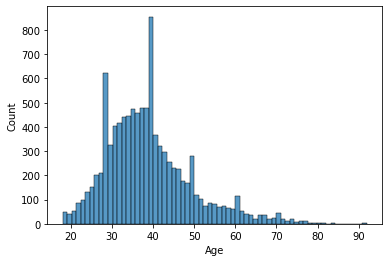

In [5]:
sns.histplot(x='Age', data=cars)

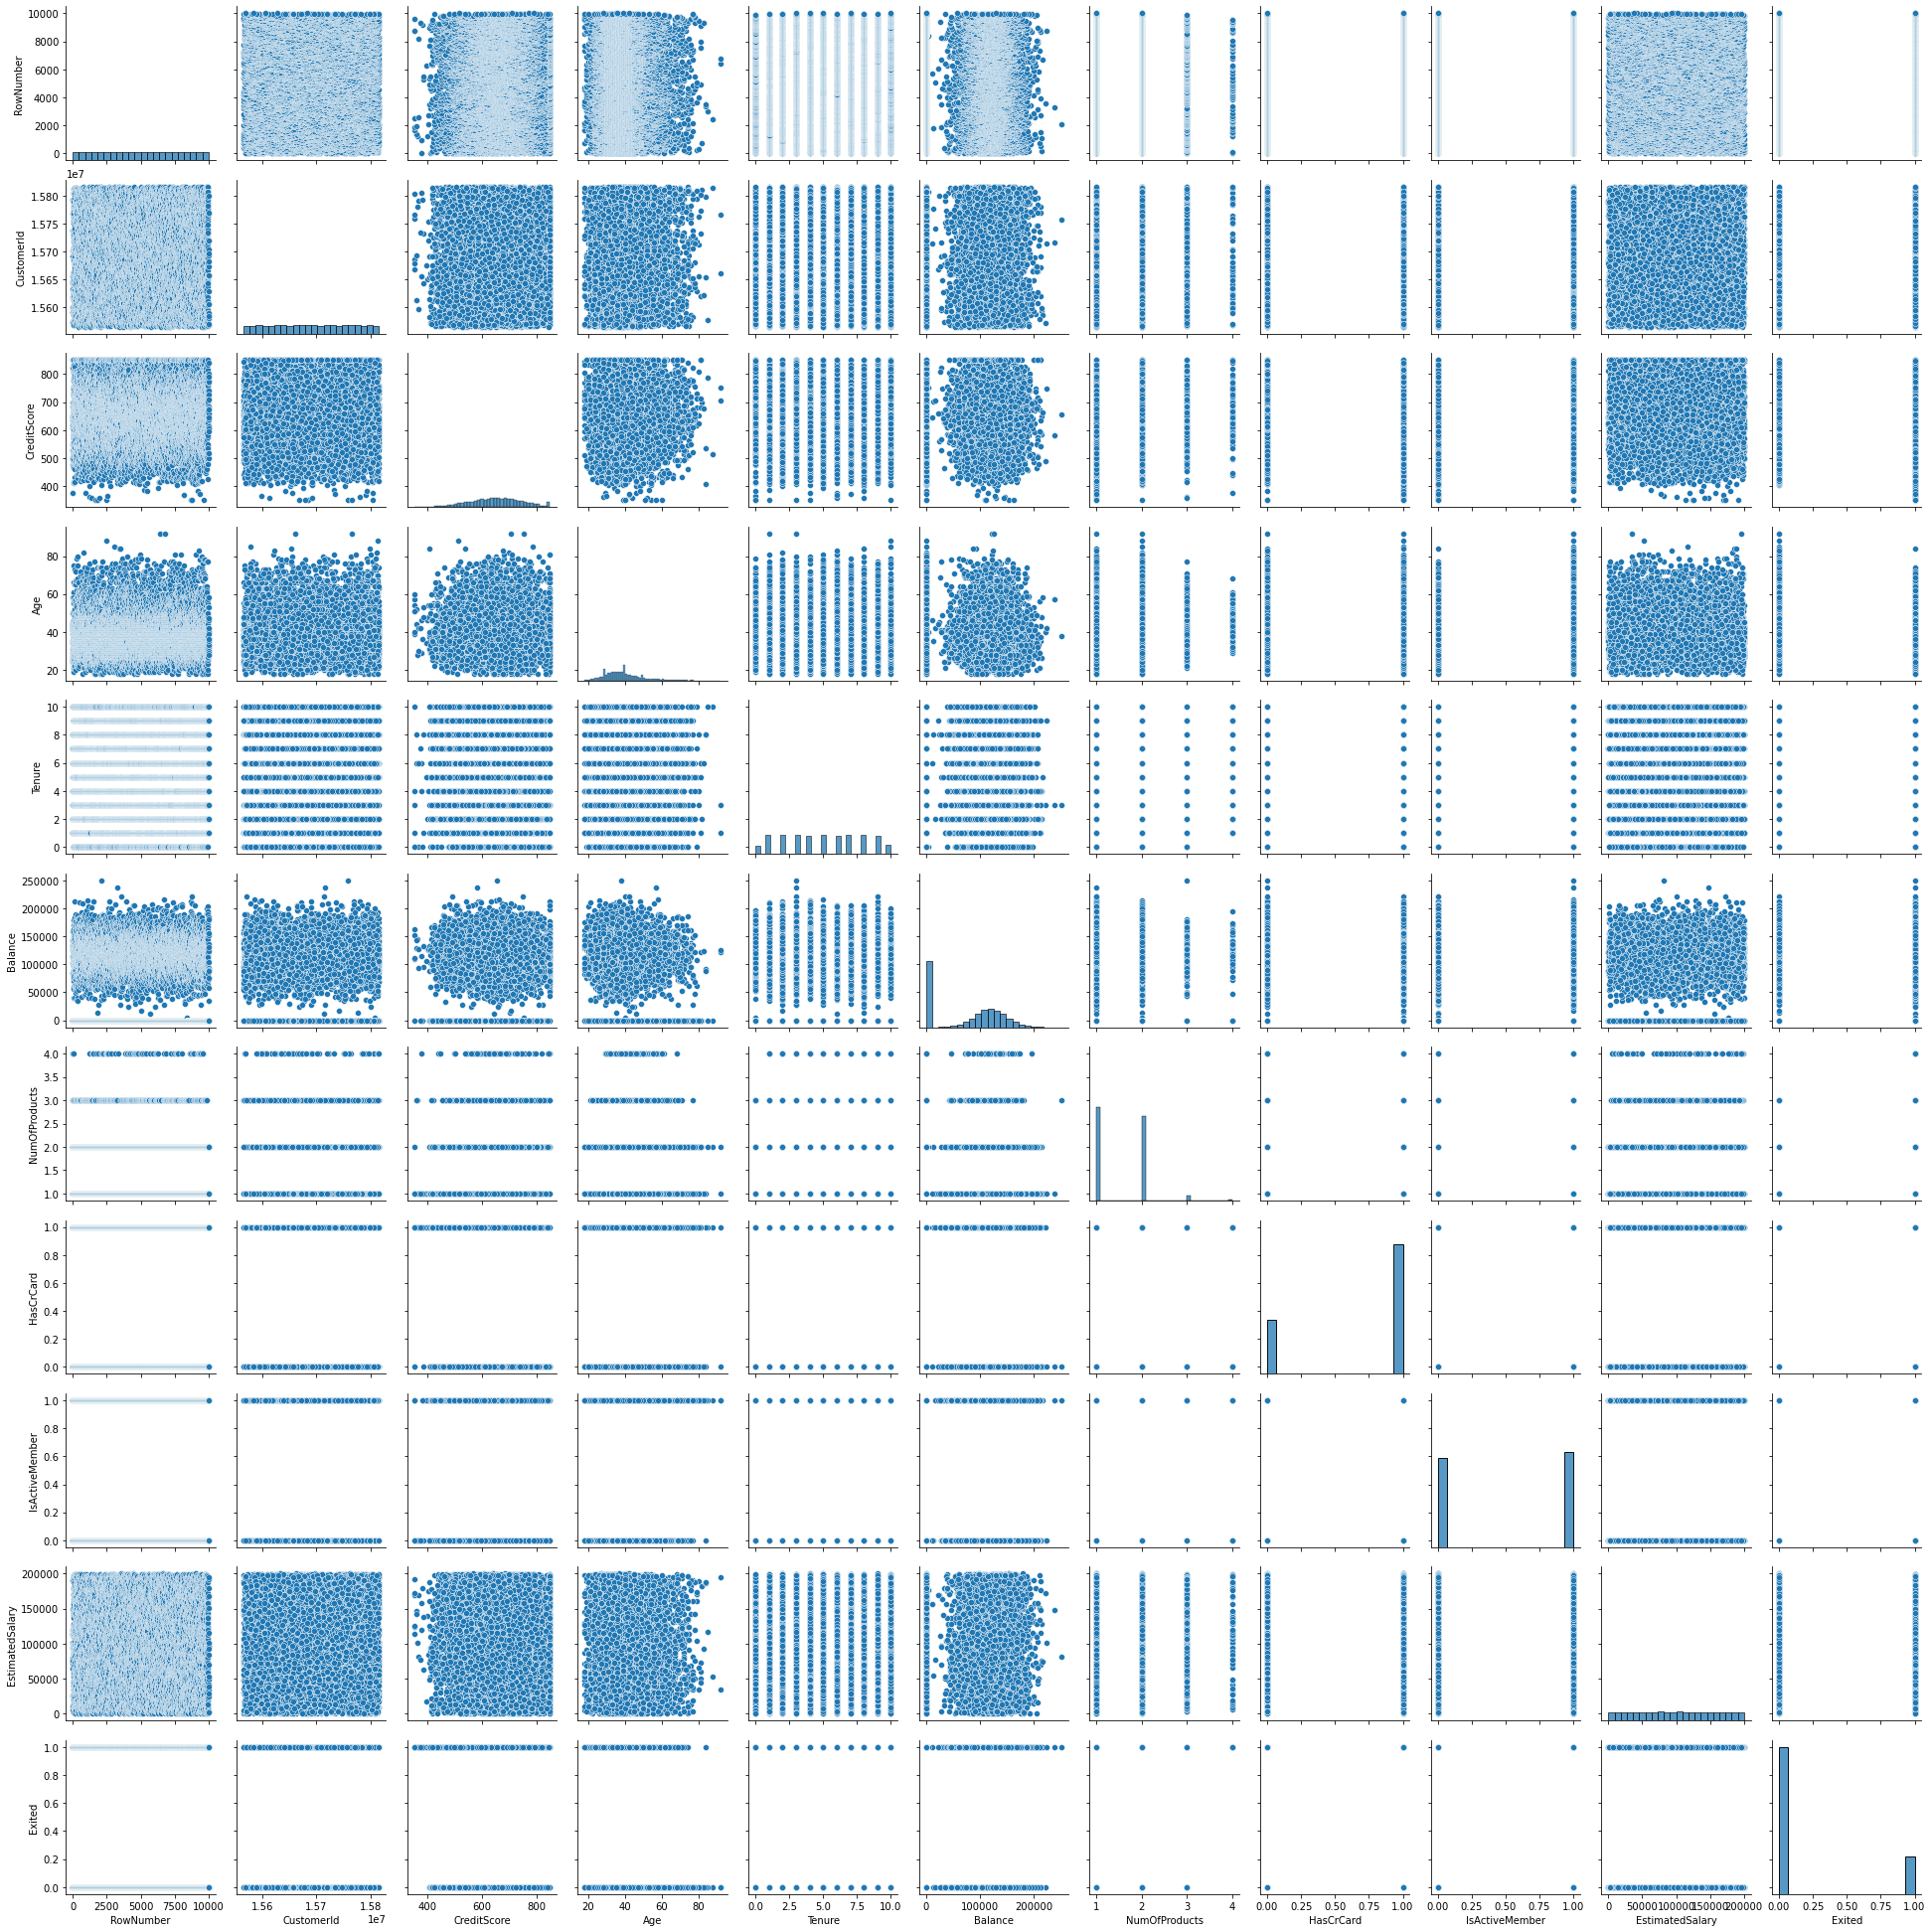

In [6]:
sns.pairplot(cars);

In [7]:
import random as random
%matplotlib inline
cars["Age"].mean()

38.9218

In [8]:
cars.isnull()

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender    Age  \
0         False       False    False        False      False   False  False   
1         False       False    False        False      False   False  False   
2         False       False    False        False      False   False  False   
3         False       False    False        False      False   False  False   
4         False       False    False        False      False   False  False   
...         ...         ...      ...          ...        ...     ...    ...   
9995      False       False    False        False      False   False  False   
9996      False       False    False        False      False   False  False   
9997      False       False    False        False      False   False  False   
9998      False       False    False        False      False   False  False   
9999      False       False    False        False      False   False  False   

      Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0      False    False          False      False           False   
1      False    False          False      False           False   
2      False    False          False      False           False   
3      False    False          False      False           False   
4      False    False          False      False           False   
...      ...      ...            ...        ...             ...   
9995   False    False          False      False           False   
9996   False    False          False      False           False   
9997   False    False          False      False           False   
9998   False    False          False      False           False   
9999   False    False          False      False           False   

      EstimatedSalary  Exited  
0               False   False  
1               False   False  
2               False   False  
3               False   False  
4               False   False  
...               ...     ...  
9995            False   False  
9996            False   False  
9997            False   False  
9998            False   False  
9999            False   False  

[10000 rows x 14 columns]

In [10]:
cars.fillna(0)

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [45]:
import plotly.express as px
df = px.histogram(cars, x='Age')
df.show()

In [14]:
def impute_outliers_IQR(cars):

   q1=cars.quantile(0.25)

   q3=cars.quantile(0.75)

   IQR=q3-q1

   upper = cars[~(cars>(q3+1.5*IQR))].max()

   lower = cars[~(cars<(q1-1.5*IQR))].min()

   cars = np.where(cars > upper,

       cars.mean(),

       np.where(

           cars < lower,

           cars.mean(),

           cars

           )

       )

   return cars

cars['Age'] = impute_outliers_IQR(cars['Age'])
cars.describe()['Age']

count    10000.000000
mean        37.832293
std          8.646205
min         18.000000
25%         32.000000
50%         37.000000
75%         43.000000
max         62.000000
Name: Age, dtype: float64

In [15]:
cars.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
obj_df = cars.select_dtypes(include=['object']).copy()
obj_df.head()

Surname Geography  Gender
0  Hargrave    France  Female
1      Hill     Spain  Female
2      Onio    France  Female
3      Boni    France  Female
4  Mitchell     Spain  Female

In [13]:
obj_df["Surname"] = obj_df["Surname"].astype('category')
obj_df.dtypes

Surname      category
Geography      object
Gender         object
dtype: object

In [14]:
x= cars.iloc[:, :-1].values
print(x)

[[1 15634602 'Hargrave' ... 1 1 101348.88]
 [2 15647311 'Hill' ... 0 1 112542.58]
 [3 15619304 'Onio' ... 1 0 113931.57]
 ...
 [9998 15584532 'Liu' ... 0 1 42085.58]
 [9999 15682355 'Sabbatini' ... 1 0 92888.52]
 [10000 15628319 'Walker' ... 1 0 38190.78]]


In [15]:
obj_df["Surname"] = obj_df["Surname"].cat.codes
obj_df.head()

Surname Geography  Gender
0     1115    France  Female
1     1177     Spain  Female
2     2040    France  Female
3      289    France  Female
4     1822     Spain  Female

In [16]:
y = cars.iloc[:, -1].values
print(y)

[1 0 1 ... 1 1 0]


In [17]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
data = asarray([[100, 0.001],[8, 0.05],[50, 0.005],[88, 0.07],[4, 0.1]])
print(data)
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [37]:
df = pd.read_csv('Churn_Modelling.csv')
columns = ['CreditScore','EstimatedSalary','Age','Tenure','Balance']
df = df.loc[:, columns]
df.head(10)

CreditScore  EstimatedSalary  Age  Tenure    Balance
0          619        101348.88   42       2       0.00
1          608        112542.58   41       1   83807.86
2          502        113931.57   42       8  159660.80
3          699         93826.63   39       1       0.00
4          850         79084.10   43       2  125510.82
5          645        149756.71   44       8  113755.78
6          822         10062.80   50       7       0.00
7          376        119346.88   29       4  115046.74
8          501         74940.50   44       4  142051.07
9          684         71725.73   27       2  134603.88

In [38]:
features = ['CreditScore','EstimatedSalary','Age','Tenure']
X = df.loc[:, features]
y = df.loc[:, ['Balance']]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [40]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth = 2, random_state = 0)
reg.fit(X_train, y_train)
reg.predict(X_test[0:10])

array([74756.88957333, 74756.88957333, 79499.63256237, 74756.88957333,
       74756.88957333, 79499.63256237, 74756.88957333, 74756.88957333,
       79499.63256237, 79499.63256237])

In [42]:
X_test.head(1)

CreditScore  EstimatedSalary  Age  Tenure
9394          597        192852.67   35       8

In [44]:
score = reg.score(X_test, y_test)
print(score)

-0.0024925925846368546
